In [25]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [26]:
data = []
with open('iris.data','r')as f:
  for line in f:
    if line.strip():
      item = line.strip().split(",")
      data.append( ([float(val) for val in item[:-1]],item[-1]) )

species = {s: i for i, s in enumerate(set(d[1] for d in data))}
data = [(d[0], species[d[1]]) for d in data]

In [27]:
data

[([5.1, 3.5, 1.4, 0.2], 1),
 ([4.9, 3.0, 1.4, 0.2], 1),
 ([4.7, 3.2, 1.3, 0.2], 1),
 ([4.6, 3.1, 1.5, 0.2], 1),
 ([5.0, 3.6, 1.4, 0.2], 1),
 ([5.4, 3.9, 1.7, 0.4], 1),
 ([4.6, 3.4, 1.4, 0.3], 1),
 ([5.0, 3.4, 1.5, 0.2], 1),
 ([4.4, 2.9, 1.4, 0.2], 1),
 ([4.9, 3.1, 1.5, 0.1], 1),
 ([5.4, 3.7, 1.5, 0.2], 1),
 ([4.8, 3.4, 1.6, 0.2], 1),
 ([4.8, 3.0, 1.4, 0.1], 1),
 ([4.3, 3.0, 1.1, 0.1], 1),
 ([5.8, 4.0, 1.2, 0.2], 1),
 ([5.7, 4.4, 1.5, 0.4], 1),
 ([5.4, 3.9, 1.3, 0.4], 1),
 ([5.1, 3.5, 1.4, 0.3], 1),
 ([5.7, 3.8, 1.7, 0.3], 1),
 ([5.1, 3.8, 1.5, 0.3], 1),
 ([5.4, 3.4, 1.7, 0.2], 1),
 ([5.1, 3.7, 1.5, 0.4], 1),
 ([4.6, 3.6, 1.0, 0.2], 1),
 ([5.1, 3.3, 1.7, 0.5], 1),
 ([4.8, 3.4, 1.9, 0.2], 1),
 ([5.0, 3.0, 1.6, 0.2], 1),
 ([5.0, 3.4, 1.6, 0.4], 1),
 ([5.2, 3.5, 1.5, 0.2], 1),
 ([5.2, 3.4, 1.4, 0.2], 1),
 ([4.7, 3.2, 1.6, 0.2], 1),
 ([4.8, 3.1, 1.6, 0.2], 1),
 ([5.4, 3.4, 1.5, 0.4], 1),
 ([5.2, 4.1, 1.5, 0.1], 1),
 ([5.5, 4.2, 1.4, 0.2], 1),
 ([4.9, 3.1, 1.5, 0.1], 1),
 ([5.0, 3.2, 1.2, 0.

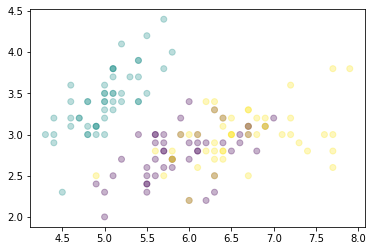

In [28]:
plt.scatter([d[0][0] for d in data],
            [d[0][1] for d in data], c = [d[1] for d in data], alpha=0.3)
plt.show()

In [29]:
random.shuffle(data)

In [30]:
train = data[:-30]

In [31]:
test = data[-30:]

In [32]:
def distance(a,b):
  s=0
  for i in range(len(a[0])):
    s += (a[0][i] - b[0][i])**2
    return s**0.5

In [33]:
def knn_classify(k,query,train):
  knns = sorted((distance(point,query),point)for point in train)[:k]

  scores = {}
  for dist,point in knns:
    scores[point[1]] = scores.get(point[1],0) + 1/(1+dist)

  resp, score = max(scores.items(),key=lambda x: x[1])

  return resp

In [34]:
k = 3
correct = sum(1 for t in test if knn_classify(k,t,train)==t[1])
accuracy = correct/len(test)
print("accuracy: ",accuracy)

accuracy:  0.6


100%|██████████| 100/100 [00:09<00:00, 10.05it/s]


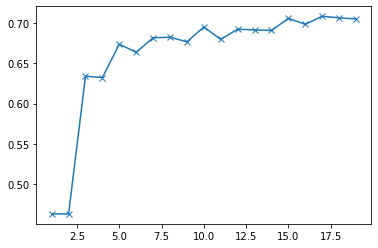

In [35]:
num_trials = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
corrects = [0]*20
for i in tqdm(range(num_trials)):
  random.shuffle(data)
  train = data[:train_size]
  test = data[train_size:]
  for k in range(1,20):
    corrects[k] += sum(1 for t in test if knn_classify(k, t, train) == t[1])
for k in range(1,20):
  corrects[k] /= num_trials * test_size
plt.plot(range(1,20), corrects[1:], '-x')
plt.show()